In [6]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [13]:
#read 
df=pd.read_csv('./PROject DATA/PL2.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: './PROject DATA/PL2.csv'

In [ ]:
import re
df['text'] = df['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
df['text'] = df['text'].str.replace('[^a-zA-Z0-9]', ' ')
df

/var/folders/3_/7844j3yx28qg31v5lrccmcv40000gn/T/ipykernel_1171/3474533095.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
/var/folders/3_/7844j3yx28qg31v5lrccmcv40000gn/T/ipykernel_1171/3474533095.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^a-zA-Z0-9]', ' ')


,Unnamed: 0,created_at,file_name,followers,friends,group_name,location,retweet_count,screenname,search_query,text,twitter_id,username,polarity,partition_0,partition_1,created_at.1
0,NaN,2020-07-09 11:34:08,Liverpool,697325,594,Liverpool FC,Liverpool,0,LivEchoLFC,#liverpoolfc OR #YNWA OR #LFC,This is a strange claim LFC,1281189890936504320,Liverpool FC News,-0.2023,EPL,Liverpool,NaN
1,NaN,2020-07-09 11:33:52,Liverpool,2348,2907,Liverpool FC,Huyton,65,ged11lfc,#liverpoolfc OR #YNWA OR #LFC,RT TheKopiteOFF LFC have won 30 of their...,1281189827468279808,Ged Smith,0.8316,EPL,Liverpool,NaN
2,NaN,2020-07-09 11:33:52,Liverpool,465,177,Liverpool FC,"Accra, Ghana",32,calvin_winzy,#liverpoolfc OR #YNWA OR #LFC,RT SkySportsPL LFC secure first away wi...,1281189824465174528,DADA BA♐,0.8793,EPL,Liverpool,NaN
3,NaN,2020-07-09 11:33:50,Liverpool,334,1524,Liverpool FC,NaN,0,Rurs1,#liverpoolfc OR #YNWA OR #LFC,Outrageous Poor auld Martin Tyler has to ju...,1281189816890245121,Ruairi Nolan,-0.6808,EPL,Liverpool,NaN
4,NaN,2020-07-09 11:33:31,Liverpool,760,1264,Liverpool FC,"Kildare, Ireland 🇮🇪",176,LSHighVoltage,#liverpoolfc OR #YNWA OR #LFC,RT TheRedmenTV Won the league Fastest te...,1281189739618611200,🇮🇪 David D'Arcy 🇮🇪,0.8176,EPL,Liverpool,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,NaN,2020-07-12 12:38:03,Chelsea,163,636,Chelsea FC,"Bandung,Indonesia",416,koerniawanangga,#Chelsea OR #ChelseaFC #CFC,RT NicoSchira Chelsea preparing 1st offer ...,1282293142251692032,Angga Kurniawan,0.0000,EPL,Chelsea,NaN
440,NaN,2020-07-12 12:37:50,Chelsea,283,1071,Chelsea FC,NaN,416,Xain_28,#Chelsea OR #ChelseaFC #CFC,RT NicoSchira Chelsea preparing 1st offer ...,1282293088464113664,Zain,0.0000,EPL,Chelsea,NaN
441,NaN,2020-07-12 12:37:07,Chelsea,892,3060,Chelsea FC,Nsakina Ghana,6,ElishaCarta,#Chelsea OR #ChelseaFC #CFC,RT RJ Goodthings Post Match Reflection Che...,1282292907144249346,ELISHA CARTA ♻🇬🇭,0.0000,EPL,Chelsea,NaN
442,NaN,2020-07-12 12:36:32,Chelsea,69,695,Chelsea FC,"Chennai, India",416,The_12th_playa,#Chelsea OR #ChelseaFC #CFC,RT NicoSchira Chelsea preparing 1st offer ...,1282292757961179136,Yat,0.0000,EPL,Chelsea,NaN


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#create the model and fit the model to the data
vectorizer = CountVectorizer()
# change the dtype to int32
matrix = vectorizer.fit_transform(df.text).astype('int32')
#transform the result to a dataframe
count = pd.DataFrame(matrix.toarray(),columns=vectorizer.get_feature_names_out(),index=df.twitter_id)
#merge dataframes
df=pd.merge(df,count,on="twitter_id")
#drop id
df.drop(columns=("twitter_id"),inplace=True)
df.to_csv('PL_py.csv')

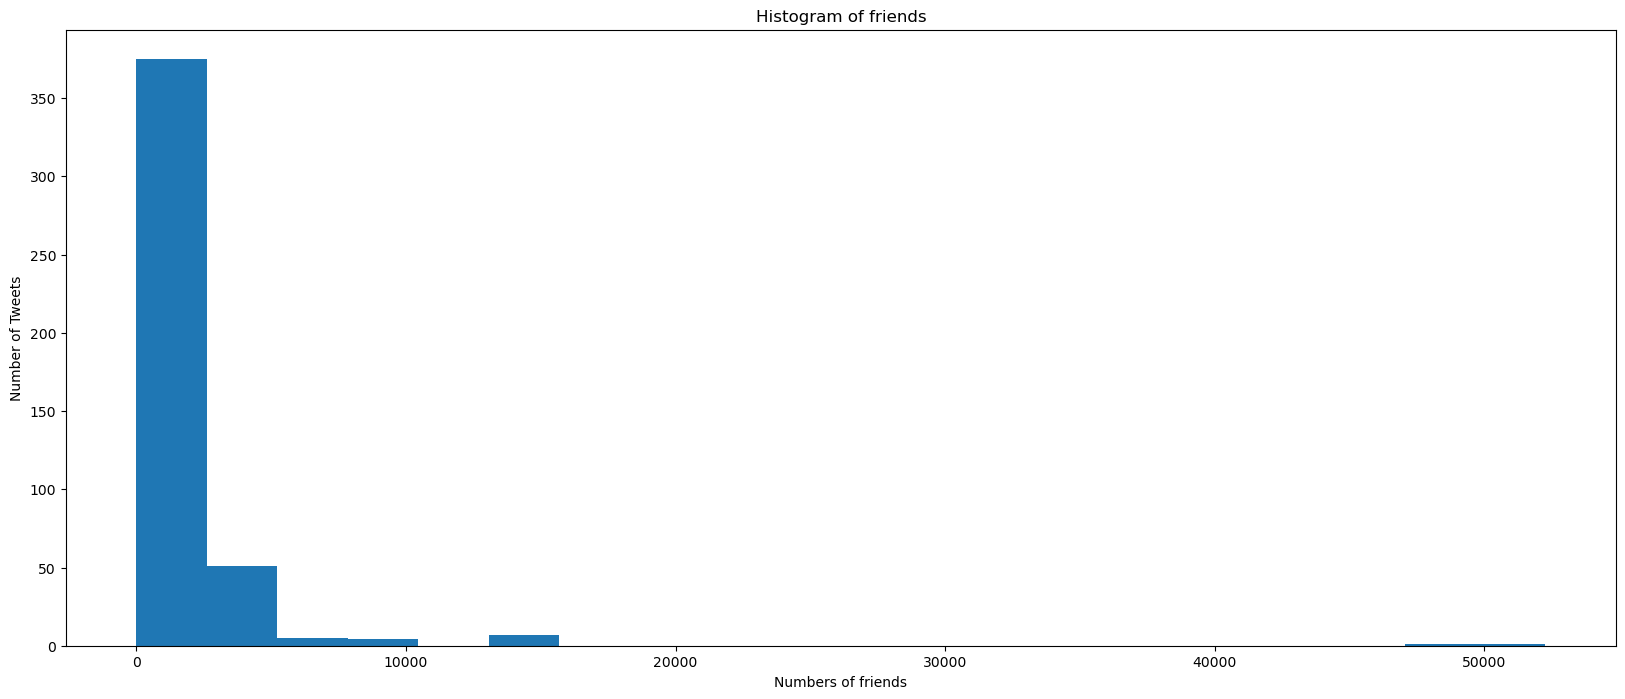

In [ ]:
fig1,ax=plt.subplots(figsize=(20,8))
ax.hist(df['friends_x'],bins=20)
plt.title("Histogram of friends")
plt.xlabel("Numbers of friends")
plt.ylabel("Number of Tweets")
plt.savefig('Follower.png')

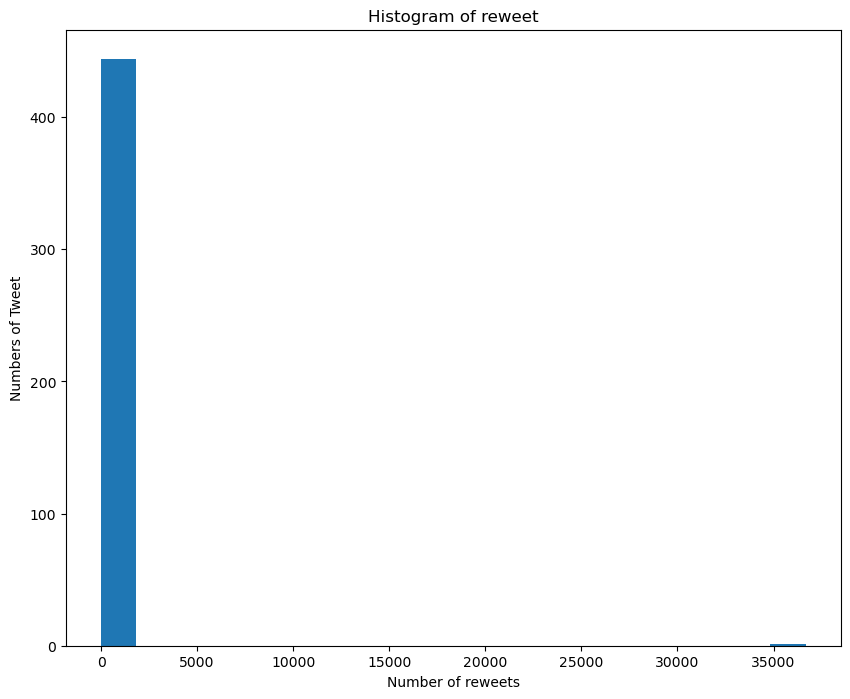

In [ ]:
fig1,ax=plt.subplots(figsize=(10,8))
ax.hist(df['retweet_count'],bins=20)
plt.title("Histogram of reweet")
plt.xlabel("Number of reweets")
plt.ylabel("Numbers of Tweet")
plt.savefig('reweet.png')

In [ ]:
df.loc['Total']=df.sum()
df

/var/folders/3_/7844j3yx28qg31v5lrccmcv40000gn/T/ipykernel_1171/1390183177.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.loc['Total']=df.sum()


,Unnamed: 0,created_at,file_name,followers,friends_x,group_name,location,retweet_count,screenname,search_query,...,yoo,you,young,younger,youngprofessionals,your,yourself,zeha,zerowaste,zidane
0,NaN,2020-07-09 11:34:08,Liverpool,697325,594,Liverpool FC,Liverpool,0,LivEchoLFC,#liverpoolfc OR #YNWA OR #LFC,...,0,0,0,0,0,0,0,0,0,0
1,NaN,2020-07-09 11:33:52,Liverpool,2348,2907,Liverpool FC,Huyton,65,ged11lfc,#liverpoolfc OR #YNWA OR #LFC,...,0,0,0,0,0,0,0,0,0,0
2,NaN,2020-07-09 11:33:52,Liverpool,465,177,Liverpool FC,"Accra, Ghana",32,calvin_winzy,#liverpoolfc OR #YNWA OR #LFC,...,0,0,0,0,0,0,0,0,0,0
3,NaN,2020-07-09 11:33:50,Liverpool,334,1524,Liverpool FC,NaN,0,Rurs1,#liverpoolfc OR #YNWA OR #LFC,...,0,0,0,0,0,0,0,0,0,0
4,NaN,2020-07-09 11:33:31,Liverpool,760,1264,Liverpool FC,"Kildare, Ireland 🇮🇪",176,LSHighVoltage,#liverpoolfc OR #YNWA OR #LFC,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,NaN,2020-07-12 12:37:50,Chelsea,283,1071,Chelsea FC,NaN,416,Xain_28,#Chelsea OR #ChelseaFC #CFC,...,0,0,0,0,0,0,0,0,0,0
441,NaN,2020-07-12 12:37:07,Chelsea,892,3060,Chelsea FC,Nsakina Ghana,6,ElishaCarta,#Chelsea OR #ChelseaFC #CFC,...,0,0,0,0,0,0,0,0,0,0
442,NaN,2020-07-12 12:36:32,Chelsea,69,695,Chelsea FC,"Chennai, India",416,The_12th_playa,#Chelsea OR #ChelseaFC #CFC,...,0,0,0,0,0,0,0,0,0,0
443,NaN,2020-07-12 12:36:12,Chelsea,1561,2675,Chelsea FC,"Körfez, Kocaeli",416,argungokhann,#Chelsea OR #ChelseaFC #CFC,...,0,0,0,0,0,0,0,0,0,0
